<a href="https://colab.research.google.com/github/ha55anali/fyp/blob/main/fyp_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive2')

Mounted at /content/drive2


In [ ]:
drive_wsi_path='/content/drive2/MyDrive/CAMELYON17'

# setup

In [ ]:
!sudo apt install openslide-tools --quiet
!pip install openslide-python --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (120 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This front

In [ ]:
import glob
import os
import shutil

from pathlib import Path

# copy data

In [ ]:
zip_path='training'
test=glob.glob(os.path.join(drive_wsi_path, zip_path,"*","*.zip"))



In [ ]:
# move on zip to drive
shutil.copy(test[0], '/content/')

'/content/patient_016.zip'

In [ ]:
!unzip /content/patient_016.zip

Archive:  /content/patient_016.zip
  inflating: patient_016_node_0.tif  
  inflating: patient_016_node_1.tif  
  inflating: patient_016_node_2.tif  
  inflating: patient_016_node_3.tif  
  inflating: patient_016_node_4.tif  


In [ ]:

import openslide


slide=openslide.OpenSlide('/content/data/patient_016_node_1.tif')


((96651, 197226), (48325, 98613), (24162, 49306), (12081, 24653), (6040, 12326), (3020, 6163), (1510, 3081), (755, 1540), (377, 770))


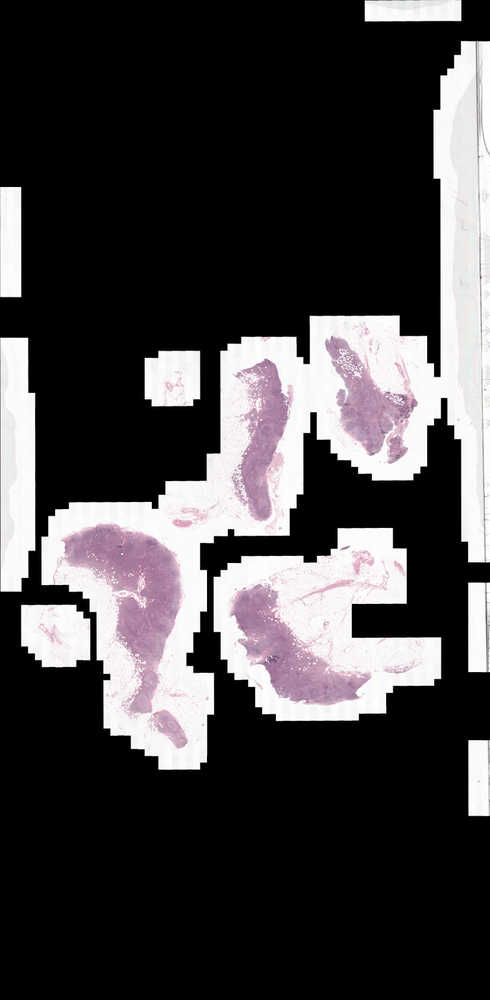

In [ ]:
print(slide.level_dimensions)
slide.get_thumbnail((1000,1000))

In [ ]:
!git clone https://github.com/mahmoodlab/CLAM.git

Cloning into 'CLAM'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 543 (delta 128), reused 157 (delta 51), pack-reused 263
Receiving objects: 100% (543/543), 46.81 MiB | 26.84 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [ ]:
!mkdir data
!ls | grep tif | xargs -I aa mv aa data

In [ ]:
!python CLAM/create_patches.py --source data --save_dir RESULTS_DIRECTORY --patch_size 256 --seg #--patch --stitch 


source:  data
patch_save_dir:  RESULTS_DIRECTORY/patches
mask_save_dir:  RESULTS_DIRECTORY/masks
stitch_save_dir:  RESULTS_DIRECTORY/stitches
source : data
save_dir : RESULTS_DIRECTORY
patch_save_dir : RESULTS_DIRECTORY/patches
mask_save_dir : RESULTS_DIRECTORY/masks
stitch_save_dir : RESULTS_DIRECTORY/stitches
{'seg_params': {'seg_level': -1, 'sthresh': 8, 'mthresh': 7, 'close': 4, 'use_otsu': False, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': 100, 'a_h': 16, 'max_n_holes': 8}, 'patch_params': {'white_thresh': 5, 'black_thresh': 40, 'use_padding': True, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': -1, 'line_thickness': 250}}


progress: 0.00, 0/5
processing patient_016_node_0.tif
segmentation took 2.1628153324127197 seconds
patching took -1 seconds
stitching took -1 seconds


progress: 0.20, 1/5
processing patient_016_node_1.tif
segmentation took 1.7490472793579102 seconds
patching took -1 seconds
stitching took -1 seconds


progress: 0.40, 2/5
proces

In [ ]:
!unzip '/content/drive/MyDrive/CAMELYON17/training/lesion_annotations.zip' -d /content

Archive:  /content/drive/MyDrive/CAMELYON17/training/lesion_annotations.zip
  inflating: /content/patient_004_node_4.xml  
  inflating: /content/patient_009_node_1.xml  
  inflating: /content/patient_010_node_4.xml  
  inflating: /content/patient_012_node_0.xml  
  inflating: /content/patient_015_node_1.xml  
  inflating: /content/patient_015_node_2.xml  
  inflating: /content/patient_016_node_1.xml  
  inflating: /content/patient_017_node_1.xml  
  inflating: /content/patient_017_node_2.xml  
  inflating: /content/patient_017_node_4.xml  
  inflating: /content/patient_020_node_2.xml  
  inflating: /content/patient_020_node_4.xml  
  inflating: /content/patient_021_node_3.xml  
  inflating: /content/patient_022_node_4.xml  
  inflating: /content/patient_024_node_1.xml  
  inflating: /content/patient_024_node_2.xml  
  inflating: /content/patient_034_node_3.xml  
  inflating: /content/patient_036_node_3.xml  
  inflating: /content/patient_038_node_2.xml  
  inflating: /content/patient_0

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse('/content/patient_004_node_4.xml')

In [ ]:
for child1 in tree.getroot():
    for child2 in child1:
        for child3 in child2:
            for child in child3:
                print(child.tag, child.attrib)

# https://shapely.readthedocs.io/en/stable/manual.html
# take intersection with patch shape and annotation shape to get annotation that is in the patch

Coordinate {'Order': '0', 'X': '12711.2998', 'Y': '88778.1016'}
Coordinate {'Order': '1', 'X': '12612.7998', 'Y': '88895.5'}
Coordinate {'Order': '2', 'X': '12597.7002', 'Y': '89050.7969'}
Coordinate {'Order': '3', 'X': '12703.7002', 'Y': '89160.6016'}
Coordinate {'Order': '4', 'X': '12855.0996', 'Y': '89130.2969'}
Coordinate {'Order': '5', 'X': '12938.4004', 'Y': '89001.5'}
Coordinate {'Order': '6', 'X': '12896.7998', 'Y': '88853.8984'}
Coordinate {'Order': '7', 'X': '12760.5', 'Y': '88785.7031'}
Coordinate {'Order': '0', 'X': '13357', 'Y': '87081.1016'}
Coordinate {'Order': '1', 'X': '13412', 'Y': '87057.5'}
Coordinate {'Order': '2', 'X': '13464.4004', 'Y': '87081.1016'}
Coordinate {'Order': '3', 'X': '13482.7998', 'Y': '87170.2031'}
Coordinate {'Order': '4', 'X': '13477.5', 'Y': '87275'}
Coordinate {'Order': '5', 'X': '13409.4004', 'Y': '87356.2031'}
Coordinate {'Order': '6', 'X': '13307.2002', 'Y': '87400.7969'}
Coordinate {'Order': '7', 'X': '13254.7998', 'Y': '87437.5'}
Coordinat

In [ ]:
# flow charts to be included
- wsi preparation
    - biopsy
    - scanner
    - outputs tiff file

- annotations
    - done by pathologists
    - very time intensive

- wsi to patching
    - segmentation
        -thresholding etch
    - patching
    - annotation patching
        - convert to polygons
        - convert patch to polygons
        - find intersection
        - convert polygon to mask

challenges
- wsi segmentation tuning(thresholding, blur, otsu)
- data set balancing
- 